In [15]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, multilabel_confusion_matrix
import sys
sys.path.append("..")
from utilities import PlotConfusionMatrix
import random
#https://www.codeease.net/programming/python/how-to-balance-labels-in-dataset-python

In [19]:
labels_list=[
    'interest',
    'alarm',
    'confusion',
    'understanding',
    'frustration',
    'relief',
    'sorrow',
    'joy',
    'anger',
    'gratitude',
    'fear',
    'hope',
    'boredom',
    'surprise',
    'disgust',
    'desire'
    ]
labels={
        'interest':0,
        'alarm':1,
        'confusion':2,
        'understanding':3,
        'frustration':4,
        'relief':5,
        'sorrow':6,
        'joy':7,
        'anger':8,
        'gratitude':9,
        'fear':10,
        'hope':11,
        'boredom':12,
        'surprise':13,
        'disgust':14,
        'desire':15
        }
index_map={
    0:'interest',
    1:'alarm',
    2:'confusion',
    3:'understanding',
    4:'frustration',
    5:'relief',
    6:'sorrow',
    7:'joy',
    8:'anger',
    9:'gratitude',
    10:'fear',
    11:'hope',
    12:'boredom',
    13:'surprise',
    14:'disgust',
    15:'desire'
}


In [20]:
def get_label_array(label):
    ret_data=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    ret_data[labels[label]]=1
    return ret_data

def get_label_from_array(arr):
    return index_map[arr.index(1)]


In [16]:
dataset_path='../../../data/cozmo/huggingFaceDataSets/natural_language.p'

In [17]:
new_df = None

with open(dataset_path, 'rb') as file: 
      
    # Call load method to deserialze 
    new_df = pickle.load(file) 

2
92 28


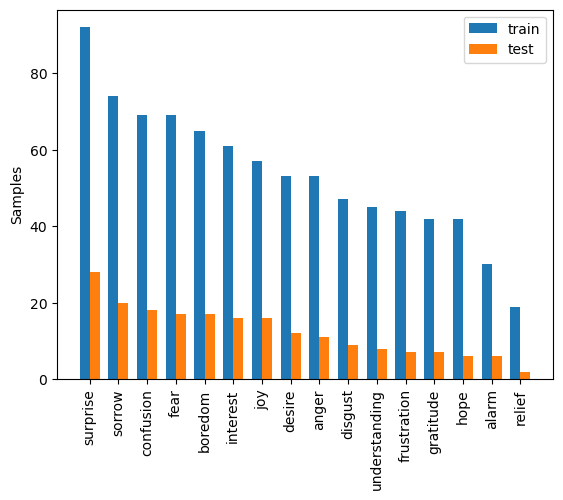

In [44]:
def plot_distribution(df_train='', df_test=''):
    distribution_train=[]
    distribution_test=[]
    all_values_train=df_train['list'].value_counts()
    all_values_test=df_test['list'].value_counts()

    for index, value in all_values_train.items():
        distribution_train.append([get_label_from_array(index), value])
        
    for index, value in all_values_test.items():
        distribution_test.append([get_label_from_array(index), value])
        
    lbls_train=[a[0] for a in distribution_train]
    counts_train=[a[1] for a in distribution_train]
    
    lbls_test=[a[0] for a in distribution_test]
    counts_test=[a[1] for a in distribution_test]
        
    values=[counts_train, counts_test]
    print(len(values))

    n = len(values)                # Number of bars to plot
    w = .35                        # With of each column
    x = np.arange(0, len(lbls_train))   # Center position of group on x axis
    label_bar=['train','test']
    for i, value in enumerate(values):
        position = x + (w*(1-n)/2) + i*w
        plt.bar(position, value, width=w, label=label_bar[i])

    plt.xticks(x, lbls_train);

    plt.ylabel('Samples')
    plt.xticks(rotation=90)
    plt.legend()
    
    return [max(all_values_train.tolist()), max(all_values_test.tolist())]

test=new_df[0:200]

tr, te =plot_distribution(new_df, test)
print(tr, te)

In [36]:
max(z.tolist())

92

In [146]:
targets=[[1,0,0,0],
         [0,1,0,0],
         [0,0,1,0],
         [0,0,0,1],
         [0,1,0,0]]

guess=[[0,1,0,0],
         [0,1,0,0],
         [1,0,0,0],
         [0,0,0,1],
         [0,1,0,0]]

labels=[[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]]

In [142]:
l=list(labels.keys())

In [6]:
y_true = pd.Series(["cat", "ant", "cat", "cat", "ant", "bird"])
y_pred = pd.Series(["ant", "ant", "cat", "cat", "ant", "cat"])
multilabel_confusion_matrix(y_true, y_pred,labels=["ant", "bird", "cat"])

array([[[3, 1],
        [0, 2]],

       [[5, 0],
        [1, 0]],

       [[2, 1],
        [1, 2]]])

[[11  3  0]
 [ 0  3  0]
 [ 0  0  3]]


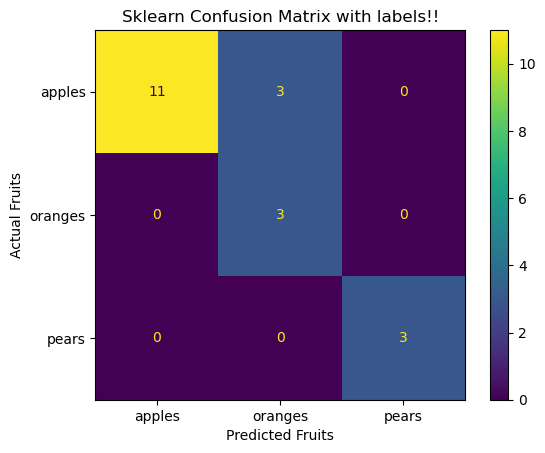

In [2]:
## The Matplotlib Library underpins the Visualizations we are about to
## demonstrate.
import matplotlib.pyplot as plt
## The scikit-learn Library (aka sklearn) provides simple and efficient
## tools for predictive data analysis.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
## For Simplicity, we start from the data that was already generated
## by the Classifier Model.
## The list 'actual_data' represents the actual(real) outputs
actual_data = \
       ['apples',  'pears',   'apples',
        'apples',  'apples',  'pears',
        'oranges', 'oranges', 'apples',
        'apples',  'apples',  'apples',
        'apples',  'apples',  'pears',
        'apples',  'oranges', 'apples',
        'apples',  'apples']
## The list 'predicted_data' represents the output generated by the
## Classifier Model. For the perfect Classification Model, the Predicted
## data would have exactly matched the Actual data. But as we all very
## well know, there is no such thing as the ‘perfect Classification Model’.
## Hence the Confusion Matrix provides a way to visualize and make
## sense of the accuracy of the Classification Model.
predicted_data = \
      ['oranges', 'pears',   'apples',
       'apples',  'apples',  'pears',
       'oranges', 'oranges', 'apples', 
       'apples',  'apples',  'apples',
       'apples',  'apples',  'pears',
       'apples',  'oranges', 'oranges',
       'apples',  'oranges']
    
## Create the Confusion Matrix out of the Actual and Predicted Data.
cm = confusion_matrix(actual_data, predicted_data)
## Print the Confusion Matrix.
print(cm)
## Create the Confusion Matrix Display Object(cmd_obj). Note the 
## alphabetical sorting order of the labels.
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['apples', 'oranges', 'pears'])
## The plot() function has to be called for the sklearn visualization
## code to do its work and the Axes object to be created.
cmd_obj.plot()
## Use the Axes attribute 'ax_' to get to the underlying Axes object.
## The Axes object controls the labels for the X and the Y axes. It
## also controls the title.
cmd_obj.ax_.set(
                title='Sklearn Confusion Matrix with labels!!', 
                xlabel='Predicted Fruits', 
                ylabel='Actual Fruits')
## Finally, call the matplotlib show() function to display the visualization
## of the Confusion Matrix.
plt.show()

In [ ]:
https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels

In [4]:
with open('../eval_data.p', 'rb') as file: 
      
    # Call load method to deserialze 
    targets, outputs = pickle.load(file) 

In [5]:
targets_labels=[]
outputs_labels=[]
for t in targets:
    targets_labels.append(get_label_from_array(t))
for t in outputs:
    outputs_labels.append(get_label_from_array(t))

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(targets_labels, outputs_labels)
print(cm)
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=labels_list)
cmd_obj.plot()
cmd_obj.ax_.set(
                title='Sklearn Confusion Matrix with labels!!', 
                xlabel='Predicted emotion', 
                ylabel='Target emotion')
plt.xticks(rotation=90)
#plt.show()
plt.savefig('confusion.png')

[[1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0]
 [2 0 1 1 0 0 0 0 0 2 1 0 0 1 0 0]
 [1 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0]
 [0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 1 0 1 0 2 0 1 0 0 0 0 0]
 [1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 1 0 0 0 0 0 0 0 2 1]
 [0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0]
 [2 1 0 1 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0]
 [0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1]
 [0 0 1 1 2 0 1 0 0 0 0 0 0 0 3 2]
 [2 0 0 2 0 0 0 0 0 0 1 0 0 0 0 0]]


In [7]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

In [8]:
# number of correct predictions / total predictions
ac=accuracy_score(targets, outputs)
print("Accuracy = ",ac)
print("{0:.2f}% of predictions were correct".format(ac*100))

print(" ")
# What proportion of positive identifications was actually correct?
# p = tp/(tp+fp)
#
p=precision_score(targets, outputs, average='weighted')
print("Precison = ",p)
print("When a model predicts an emtoion, it is right  {0:.2f}% of the time".format(p*100))
print("")
# What proportion of positive identifications was actually correct?
# r = tp/(tp+fn)
r=recall_score(targets, outputs, average='weighted')
print("Recall = ",r)
print("The model correctly identified {0:.2f}% of the targeted emotions".format(r*100))

Accuracy =  0.09302325581395349
9.30% of predictions were correct
 
Precison =  0.09732834994462901
When a model predicts an emtoion, it is right  9.73% of the time

Recall =  0.09302325581395349
The model correctly identified 9.30% of the targeted emotions


/Users/gerardocaracas/personal/gcu_research/src/huggingFace/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
f = open("../results_nl_augmented.txt", "r")
all_res=f.readlines()
f.close()

In [10]:
acc=[]
loss=[]
for a in all_res:
    if "Loss" in a:
        loss.append(a.split(' ')[4][:-1])
    if "Accuracy" in a:
        acc.append(a.split(' ')[3][:-1])

In [11]:
loss_num=[float(a) for a in loss]
acc_num=[float(a) for a in acc]

In [12]:
l_x=list(range(0,len(loss_num)))
a_x=list(range(0,len(acc_num)))

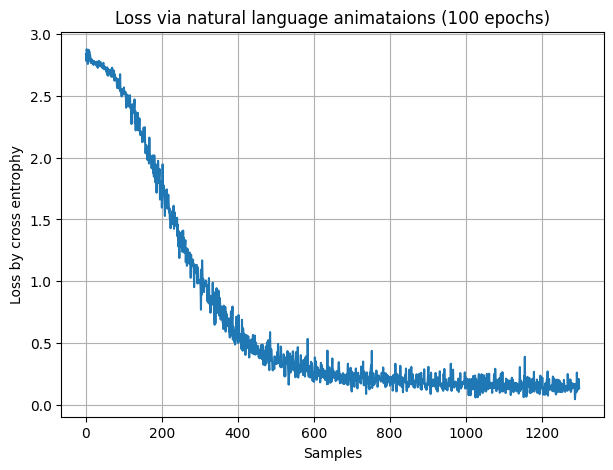

In [13]:
#plt.plot(loss_num)

# let us make a simple graph
fig = plt.figure(figsize=[7,5])
ax = plt.subplot(111)
l = ax.plot(l_x,loss_num)
# set the basic properties
ax.set_xlabel('Samples')
ax.set_ylabel('Loss by cross entrophy')
ax.set_title('Loss via natural language animataions (100 epochs)')
# set the limits
#ax.set_xlim(0, 24)
#ax.set_ylim(6, 24)

# set the grid on
ax.grid('on')
fig.savefig('loss.png')

In [14]:
#plt.plot(acc_num)
# let us make a simple graph
fig = plt.figure(figsize=[7,5])
ax = plt.subplot(111)
l = ax.plot(a_x,acc_num)
# set the basic properties
ax.set_xlabel('Samples')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy via natural language animataions (100 epochs)')
# set the limits
#ax.set_xlim(0, 24)
#ax.set_ylim(6, 24)

# set the grid on
ax.grid('on')
fig.savefig('accuracy.png')

Weights

In [18]:
new_df.head()

comment_text  \
0   Look to the front. Look to the front. walk ba...   
1   Look to the front. Look down a little bit. wa...   
2   Look down a little bit. Look down a little bi...   
3   Look to the front. Look down a little bit. Lo...   
4   Look down a little bit. Look down a little bi...   

                                               list  
0  [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]  
1  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  
2  [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]  
3  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  
4  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# compute class weights

In [37]:
new_df['list'].value_counts()

list
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]    92
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]    74
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]    69
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]    69
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]    65
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]    61
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]    57
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]    53
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]    53
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]    47
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]    45
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]    44
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]    42
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]    42
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]    30
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]    19
Name: count, dtype: int64

In [48]:
num_samples=len(new_df['list'].tolist())
num_samples

862

In [43]:
#class_weight = 1-((num_samples_in_class)/(total_num_samples))

In [46]:

weight_labels={
        'interest':( 1- (53/num_samples) ),
        'alarm':( 1- (28/num_samples) ),
        'confusion':( 1- (62/num_samples) ),
        'understanding':( 1- (37/num_samples) ),
        'frustration':( 1- (42/num_samples) ),
        'relief':( 1- (16/num_samples) ),
        'sorrow':( 1- (69/num_samples) ),
        'joy':( 1- (53/num_samples) ),
        'anger':( 1- (49/num_samples) ),
        'gratitude':( 1- (37/num_samples) ),
        'fear':( 1- (65/num_samples) ),
        'hope':( 1- (38/num_samples) ),
        'boredom':( 1- (52/num_samples) ),
        'surprise':( 1- (86/num_samples) ),
        'disgust':( 1- (45/num_samples) ),
        'desire':( 1- (48/num_samples) )
        }

In [47]:
weight_labels

{'interest': 0.9385150812064965,
 'alarm': 0.9675174013921114,
 'confusion': 0.9280742459396751,
 'understanding': 0.95707656612529,
 'frustration': 0.951276102088167,
 'relief': 0.9814385150812065,
 'sorrow': 0.919953596287703,
 'joy': 0.9385150812064965,
 'anger': 0.9431554524361949,
 'gratitude': 0.95707656612529,
 'fear': 0.9245939675174014,
 'hope': 0.9559164733178654,
 'boredom': 0.9396751740139211,
 'surprise': 0.9002320185614849,
 'disgust': 0.9477958236658933,
 'desire': 0.9443155452436195}

In [49]:
class_weights=[0.9385150812064965, 0.9675174013921114, 0.9280742459396751,
              0.95707656612529, 0.951276102088167, 0.9814385150812065,
              0.919953596287703, 0.9385150812064965, 0.9431554524361949,
              0.95707656612529, 0.9245939675174014, 0.9559164733178654,
              0.9396751740139211, 0.9002320185614849, 0.9477958236658933, 
              0.9443155452436195]